## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [29]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}

def create_df_from_cursor(cursor):
    df = pd.DataFrame(cursor.fetchall())

    columns = []
    for col in cursor.description:
        columns.append(col.name)
    df.columns = columns
    return df

sql_str = "SELECT * FROM exploratory;"
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
cursor.execute(sql_str)

df = create_df_from_cursor(cursor)
conn.close()    

df

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956
...,...,...,...,...,...
95,0.10764850635557899,-3.101785656930369,56.49091243959598,-1.9937680914933749,-0.33390259300371256
96,1.759629548272443,-1.4285652188163707,1.2644422383976943,-1.29835370396105,-2.513745570663574
97,0.8438229416103058,1.1876556600977073,-1.4100261703323511,0.566680768339602,1.0021710927237768
98,0.8671537593957526,1.1115564316783124,-1.3317181504522202,0.5131668559607284,0.9638903385103766


In [22]:
for col in df.columns:
    df[col] = df[col].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   feature_3  100 non-null    float64
 3   feature_4  100 non-null    float64
 4   feature_5  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

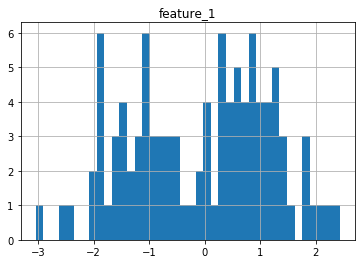

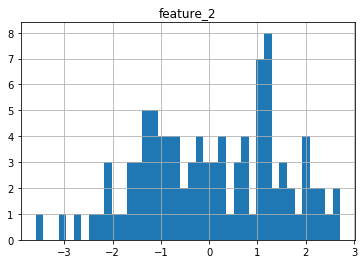

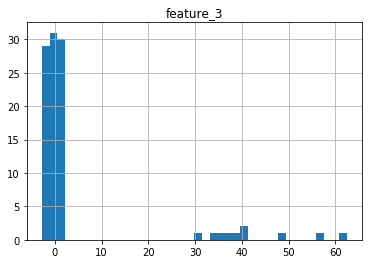

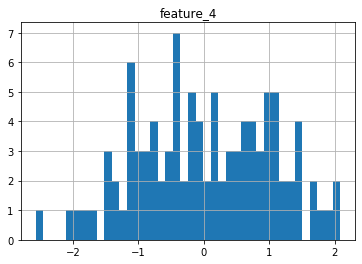

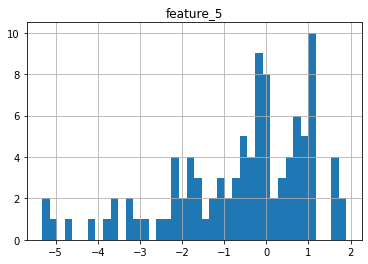

In [28]:
for col in df.columns:
    plt.figure()
    plt.title(col)
    bins = None
    if df[col].nunique() > 10:
        bins = 40
    df[col].hist(log=False, bins=bins)

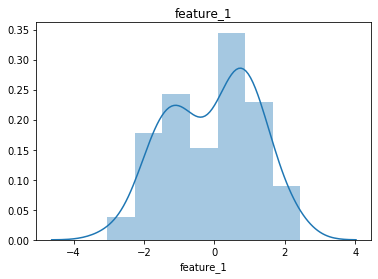

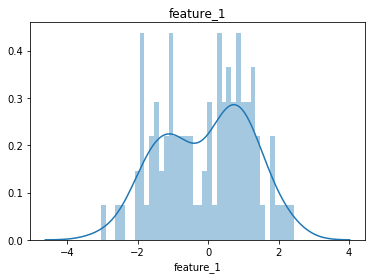

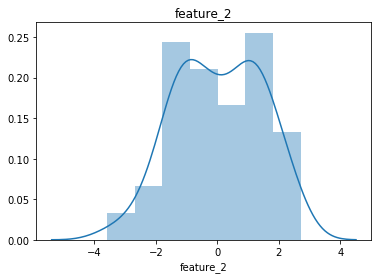

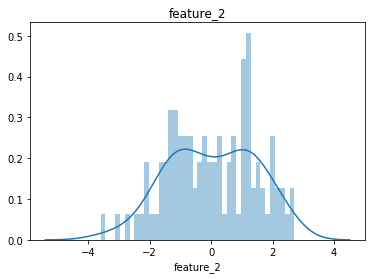

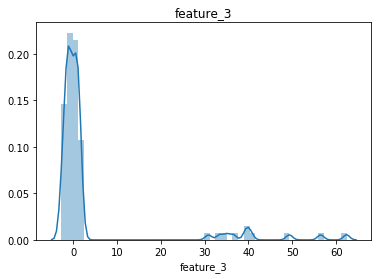

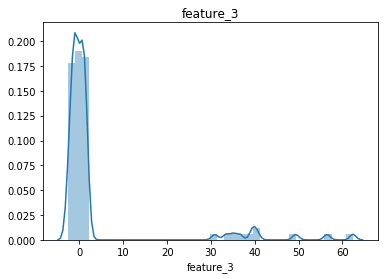

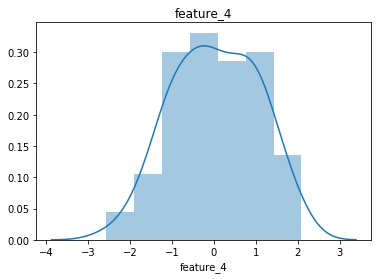

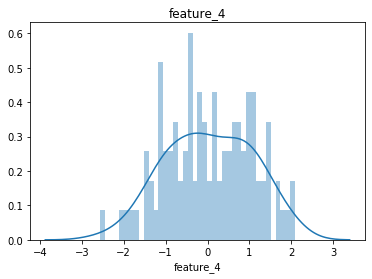

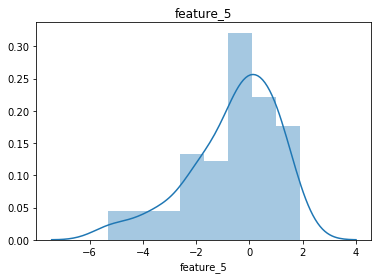

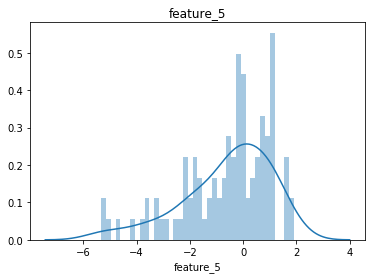

In [34]:
for col in df.columns:
    # попробуем построить с помощью seaborn с автоматическим подбором bins
    plt.figure()
    plt.title(col)
    sns.distplot(df[col])
    
    # и с указанным bins
    plt.figure()
    plt.title(col)
    sns.distplot(df[col], bins=40)

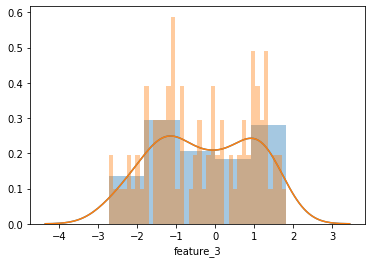

In [43]:
# построим диаграмму распределения для feature_3 без учета выбросов
sns.distplot(df[df['feature_3'] < 3]['feature_3'])
sns.distplot(df[df['feature_3'] < 3]['feature_3'], bins=40)

## 1
### feature_1
Похоже на "двугорбое" нормальное распределение (то есть возможно надо данные разбить на два сегмента). <br>
Большая часть значений находится в промежутке от -2 до 2 <br>
Вариант с бОльшим количеством разбиений позволяет лучше увидеть часто встречающиеся значения <br>
Вариант с меньшим количеством разбиений позволяет лучше увидеть общую зависимость/распределение <br>

## feature_2
Похоже на нормальное распределение с большой частотой в районе значения 1. <br>
БОльшая часть значений находится в диапазоне от -2.2 до 2.5 <br>

## feature_3
БОльшая часть значений находится в диапазоне -2.8 до 1.8. Но также присутствуют выбросы - нечасто встречающиеся значения от 28 до 65<br>

## feature_4
Распределение также близко к нормальному.<br>
При большом количестве разбиений - некоторые значения встречаются значительно чаще "соседей", но при более крупном разбиении это сглаживается.<br>
БОльшая часть значений лежит в диапазоне от -2 до 2<br>

## feature_5
Распределение сдвинуто вправо. Возможно стоит рассмотреть "хвост слева".<br>
БОльшая часть значений находится в диапазоне от -2 до 2. Причем значений выше 2 - нет, а значения от -6 до -2 встречаются относительно часто.<br>

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

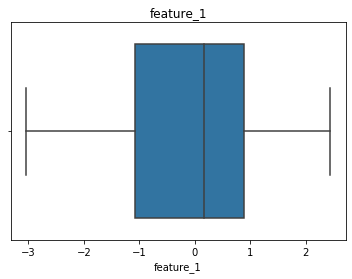

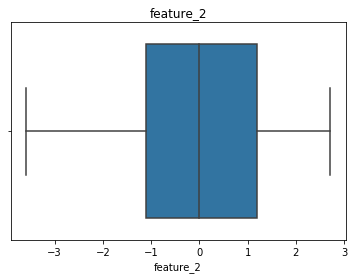

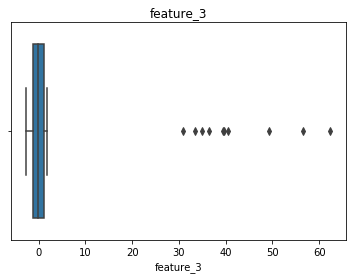

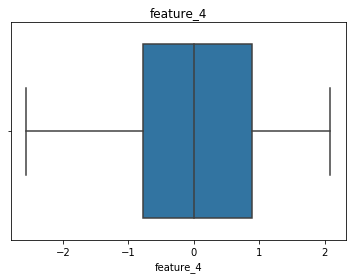

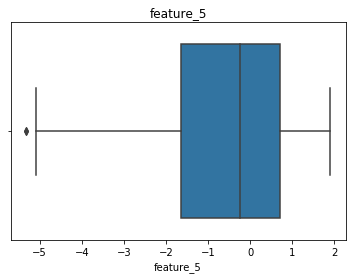

In [40]:
for col in df.columns:
    # попробуем построить с помощью seaborn с автоматическим подбором bins
    plt.figure()
    plt.title(col)
    sns.boxplot(df[col])

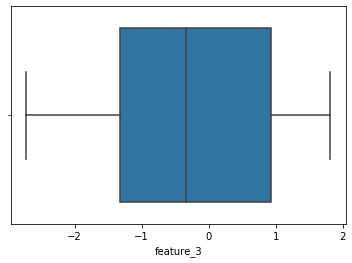

In [41]:
sns.boxplot(df[df['feature_3'] < 3]['feature_3'])

## 2
### feature_1
50% значений находятся в диапазоне от -1.1 до 0.9 <br>
Выбросов не наблюдается <br>
Медиана сдвинута вправо, выше среднего значения.<br>

### feature_2
По этому графику также видно, что распределение похоже на нормальное, но левый "усик" несколько длиннее правого <br>
50% значений находятся в диапазоне от -1.1 до 1.2<br>

### feature_3
Присутствуют выбросы со значениями в диапазоне от 28 до 65.<br>
Если не учитывать выбросы, то распределение похоже на нормальное (с провалом в верхушке колокола).<br>
50% значений лежит в диапазоне -1.3 до 1<br>

### feature_4
Распределение похоже на feature_2<br>
50% значений лежит в диапазоне от -0.9 до 0.95<br>

### feature_5
50% значений находится в диапазоне от -1.8 до 0.8 и значения сосредоточены в правой части диапазона значений.<br>
Небольшое количество выбросов (значения ниже -5)<br>

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

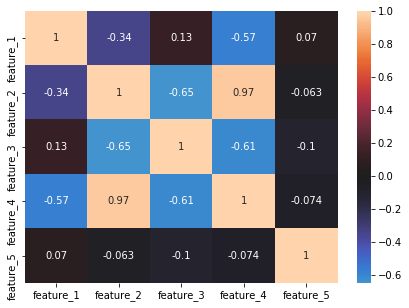

In [38]:
corr_m = df.corr()
corr_m
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

In [37]:
research_list = df.columns

Коэффициент корреляции -0.568664853720882


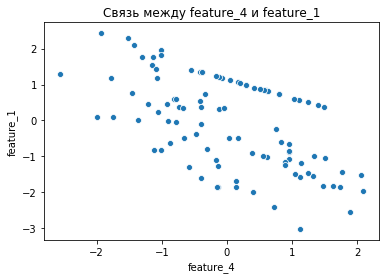

Коэффициент корреляции 0.9674128416305455


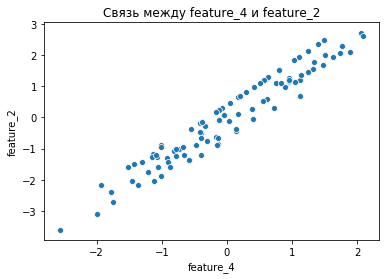

Коэффициент корреляции -0.6058776917028302


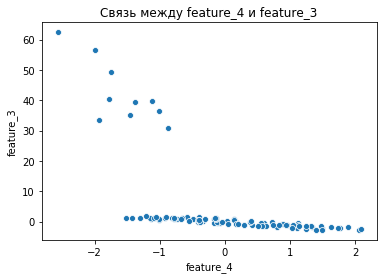

Коэффициент корреляции -0.07386273484738552


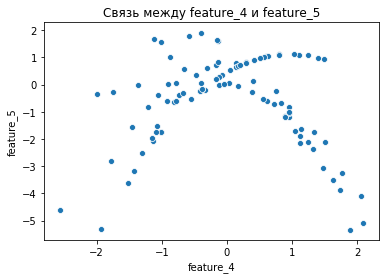

In [39]:
for i in research_list:
    if i == 'feature_4':
        continue
        
    cur_corr = df[i].corr(df.feature_4)
    sns.scatterplot(x="feature_4", y=i, data=df)
    print("Коэффициент корреляции " + str(cur_corr))
    plt.title("Связь между feature_4 и " + str(i))
    plt.show()

<b>в модель регрессии имеет включить feature_5, feature_1. Если из feature_2 убрать выбросы, то возможно зависимость станет сильной и её будем включать или не включать в модель регрессии по каким-то другим признакам.</b>

Вообще я очень плохо поняла это задание. В смысле у нас feature_4 выступает в роли Y, правильно? Так как feature_2 сильно зависит от feature_4, то зависимость feature 4 от неё сильно искать может и не надо? в смысле понятная, линейная зависимость. Или наоборот, как раз её и надо первой включать в исходные переменные? (мы же если её знаем, то считай feature 4 уже тоже плюс минус понятно какая).

То есть если бы мы исследовали влияние feature_2 и feature_4 на какое-нибудь результирующее значение, то мы бы взяли только один из этих признаков, так как второй ничего особенно сильно не добавляет. Это понятно. А в данной постановке задачи правильный ответ мне совсем не очевиден.